In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML_TermProject/wine_dataset.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.99330,3.25,0.45,10.5,5,white
1,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,red
2,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,red
3,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,white
4,8.6,0.80,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,5.7,0.25,0.27,10.8,0.050,58.0,116.0,0.99592,3.10,0.50,9.8,6,white
5023,7.4,0.25,0.29,6.8,0.020,31.0,113.0,0.99338,3.13,0.29,10.8,6,white
5024,7.8,0.28,0.25,3.4,0.024,27.0,99.0,0.98959,2.98,0.37,13.0,6,white
5025,8.3,0.16,0.48,1.7,0.057,31.0,98.0,0.99430,3.15,0.41,10.3,6,white


In [ ]:
# loading the datas
wine_dataset1=pd.read_csv("/content/drive/MyDrive/ML_TermProject/wine_dataset.csv")
wine_dataset1.shape # checking no. of rows and columns

(5027, 13)

In [ ]:
# reading first 5 rows of the dataset
wine_dataset1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.2,0.24,0.30,1.6,0.048,27.0,131.0,0.99330,3.25,0.45,10.5,5,white
1,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,red
2,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,red
3,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,white
4,8.6,0.80,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5,red


In [ ]:
# checking for missing values
wine_dataset1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [ ]:
# Data Analysis and Visualization
# Statistical measures of the dataset
wine_dataset1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000
mean,7.324547,0.356915,0.313776,5.185319,0.058921,29.235528,109.561667,0.994908,3.227752,0.544104,10.478044,5.801074
std,1.376578,0.174870,0.150084,4.568603,0.037175,17.520729,58.643300,0.002919,0.162469,0.155090,1.183096,0.869187
min,4.200000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.230000,0.240000,1.800000,0.039000,15.000000,61.000000,0.992660,3.120000,0.440000,9.500000,5.000000
50%,7.000000,0.310000,0.310000,2.700000,0.049000,27.000000,113.000000,0.995220,3.220000,0.520000,10.300000,6.000000
75%,7.800000,0.430000,0.400000,7.700000,0.072000,40.000000,152.000000,0.997100,3.330000,0.620000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,138.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


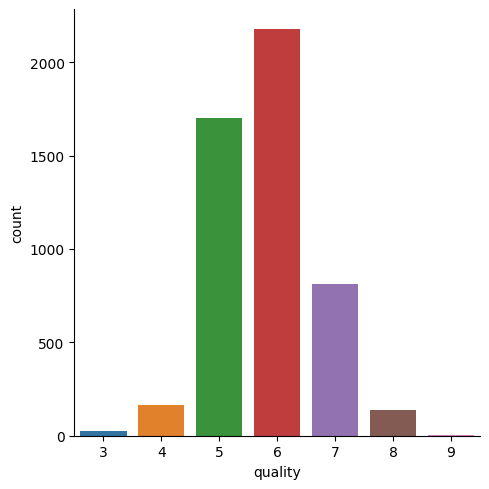

In [ ]:
# number of values for each quality
sns.catplot(x='quality',data=wine_dataset1,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

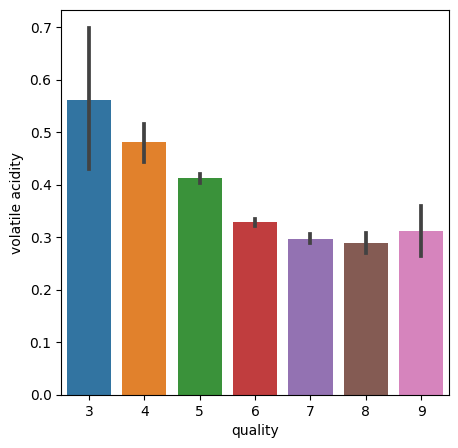

In [ ]:
# volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset1)

<Axes: xlabel='quality', ylabel='citric acid'>

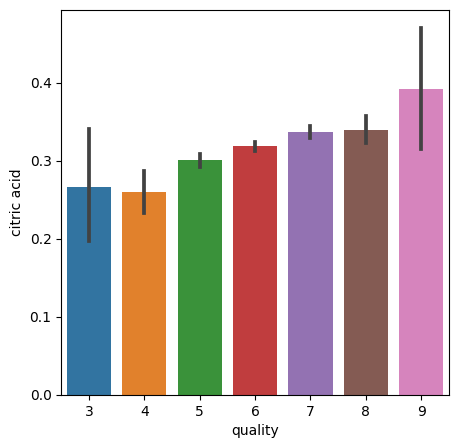

In [ ]:
# citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset1)

In [ ]:
# we can do same checks for other parameters in the column also to underssstand the data and do data analysis 

In [ ]:
# correlation
correlation=wine_dataset1.corr()

<ipython-input-11-17989e5ff11a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=wine_dataset1.corr()


<Axes: >

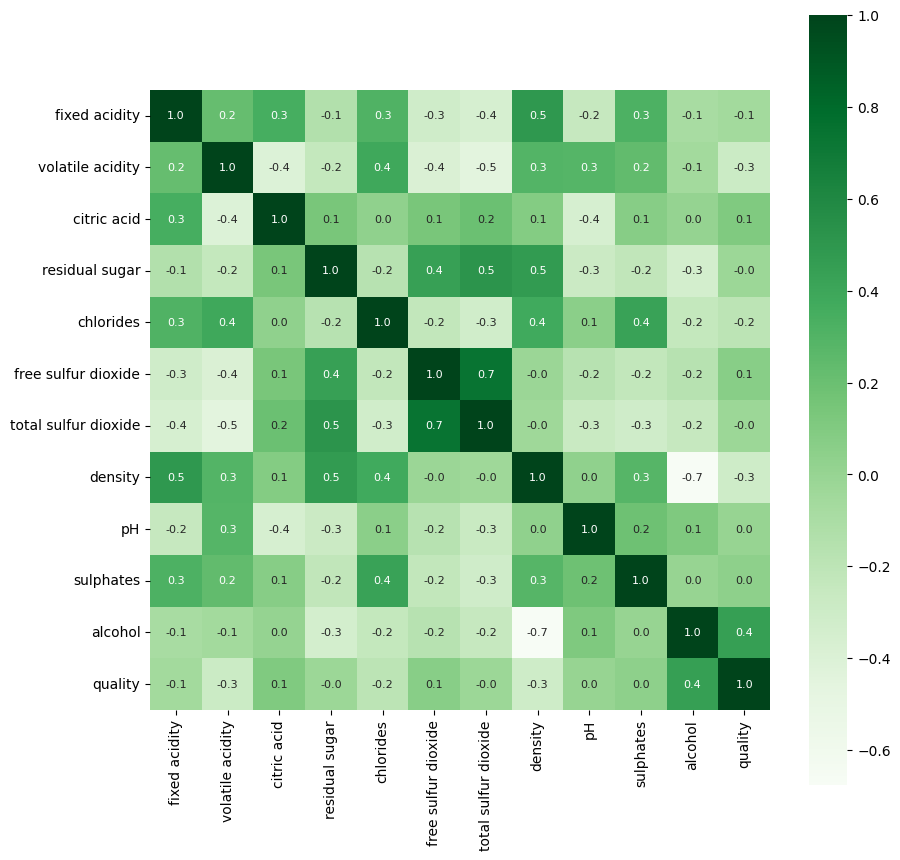

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [30]:
# Data preprocessing
# separate the data and label
X=wine_dataset1.drop('quality',axis=1)

In [31]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.2              0.24         0.30             1.6      0.048   
1               5.7              1.13         0.09             1.5      0.172   
2               7.2              0.63         0.00             1.9      0.097   
3               6.4              0.31         0.38             2.9      0.038   
4               8.6              0.80         0.11             2.3      0.084   
...             ...               ...          ...             ...        ...   
5022            5.7              0.25         0.27            10.8      0.050   
5023            7.4              0.25         0.29             6.8      0.020   
5024            7.8              0.28         0.25             3.4      0.024   
5025            8.3              0.16         0.48             1.7      0.057   
5026            6.1              0.34         0.21             5.0      0.042   

      free sulfur dioxide  

In [32]:
# Label binarization
# Label binarization
Y=wine_dataset1['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [33]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
5022    0
5023    0
5024    0
5025    0
5026    0
Name: quality, Length: 5027, dtype: int64


In [34]:
# Train and test splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [35]:
print(Y.shape,Y_train.shape,Y_test.shape)

(5027,) (4021,) (1006,)


In [36]:
print(X.shape,X_train.shape,X_test.shape)

(5027, 12) (4021, 12) (1006, 12)


In [37]:
# Model training=Random Forest Classifier
model=RandomForestClassifier()

In [44]:
# Perform one-hot encoding on the 'type' column
X_train_encoded = pd.get_dummies(X, columns=['type'])

In [45]:
model.fit(X_train_encoded, Y_train)

ValueError: ignored

In [ ]:
# Model evaluation(Accuracy score)
# accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy: ',test_data_accuracy)

In [ ]:
# Building a predictive system
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshaping the data as we are predicting the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')